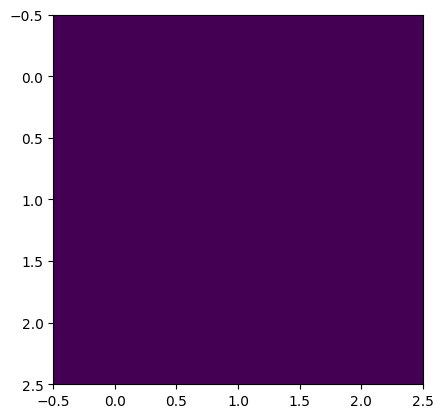

In [7]:
from matplotlib import pyplot as plt
import numpy as np 
import matplotlib.animation as animation

#run this file with `python3 game_life.py` from command line
def find_neigh(i,j,n,m):
    # i is row index in the grid
    # j is col index in the grid
    # n is col size in the grid
    # m is row index in the grid
    if i>=n or j>=m:
        print("error")
        return
    else:
        if i > 0 and i < n-1 and j > 0 and j < m-1:
            return list([[i+1,j+1],[i+1,j],[i+1,j-1],[i,j-1],[i-1,j-1],[i-1,j],[i-1,j+1],[i,j+1]])
        elif i == 0 and j == 0:
            return [[i+1,j],[i+1,j+1],[i,j+1]]
        elif i == 0 and j == m-1:
            return [[i+1,j],[i+1,j-1],[i,j-1]]
        elif (i == n-1) and (j == m-1):
            return [[i-1,j],[i-1,j-1],[i,j-1]]
        elif i == n-1 and j == 0:
            return [[i-1,j],[i-1,j+1],[i,j+1]]
        elif i == 0 :
            return [[i,j+1],[i+1,j+1],[i+1,j],[i+1,j-1],[i,j-1]]
        elif j == m-1:
            return [[i+1,j],[i+1,j-1],[i,j-1],[i-1,j-1],[i-1,j]]
        elif i == n-1:
            return [[i,j+1],[i-1,j+1],[i-1,j],[i-1,j-1],[i,j-1]]
        elif j == 0:
            return [[i+1,j],[i+1,j+1],[i,j+1],[i-1,j+1],[i-1,j]]


def next_iteration(current_state, max):
    n = int(np.shape(current_state)[0])
    m = int(np.shape(current_state)[1])
    k=0
    while np.sum(current_state) != 0 and k<max:
        k += 1
        next_state = current_state.copy()
        for i in range(n):
            for j in range(m):
                neigh = find_neigh(i,j,n,m)
                count = 0
                for ne in neigh:
                    k = ne[0]
                    h = ne[1]
                    if current_state[k,h] == 1: # se è vivo
                        count = count + 1
                if current_state[i,j] == 1:
                    if (count<2) or (count>3):
                        next_state[i,j] = 0
                else:
                    if count == 3:
                        next_state[i,j] = 1
        current_state = next_state
        plt.imshow(current_state)
        #plt.imshow(np.array([current_state[i, :] for i in range(current_state.shape[1])]))


fig=plt.figure()
current_state = np.array([[1,0,0],[0,0,1],[1,1,0]])
next_iteration(current_state,10)